In [24]:
import pandas as pd
import numpy as np
import scipy.stats as sp
import matplotlib.pyplot as plt
import os

In [4]:
#Create path using OS module for opening files.
path = os.path.join('..', 'cleandata', 'EconomicallyDisadvantagedGrade3.csv')
ED3_df = pd.read_csv(path, delimiter=',')

In [6]:
ED3_df.head(3)

,CAMPUS,DNAME,CNAME,GRADE,District Type,School Site Street Address,School Site City,School Site Zip,Below Grade Level ED_Yes,Below Grade Level ED_No,Approach Grade Level ED_Yes,Approach Grade Level ED_No,Meets Grade Level ED_Yes,Meets Grade Level ED_No,Master Grade Level ED_Yes,Master Grade Level ED_No
0,1902103,CAYUGA ISD,CAYUGA ELEM.,3,INDEPENDENT,17750 N US HWY 287,TENNESSEE COLONY,75861,6.0,0.0,17.0,23.0,15.0,23.0,7.0,20.0
1,1903102,ELKHART ISD,ELKHART INTERME,3,INDEPENDENT,301 E PARKER ST,ELKHART,75839-9701,21.0,5.0,34.0,34.0,11.0,26.0,3.0,9.0
2,1904102,FRANKSTON ISD,FRANKSTON ELEM.,3,INDEPENDENT,100 PERRY ST,FRANKSTON,75763-0428,12.0,4.0,22.0,17.0,14.0,12.0,4.0,6.0


In [8]:
#Extract the columns needed for calculations.
ED3_df.columns

Index(['CAMPUS', 'DNAME', 'CNAME', 'GRADE', 'District Type',
       'School Site Street Address', 'School Site City', 'School Site Zip',
       'Below Grade Level ED_Yes', 'Below Grade Level ED_No',
       'Approach Grade Level ED_Yes', 'Approach Grade Level ED_No',
       'Meets Grade Level ED_Yes', 'Meets Grade Level ED_No',
       'Master Grade Level ED_Yes', 'Master Grade Level ED_No'],
      dtype='object')

In [9]:
ed3_total_df = ED3_df[['District Type',
       'Below Grade Level ED_Yes', 'Below Grade Level ED_No',
       'Approach Grade Level ED_Yes', 'Approach Grade Level ED_No',
       'Meets Grade Level ED_Yes', 'Meets Grade Level ED_No',
       'Master Grade Level ED_Yes', 'Master Grade Level ED_No']]

In [10]:
ed3_total_df.head(3)

,District Type,Below Grade Level ED_Yes,Below Grade Level ED_No,Approach Grade Level ED_Yes,Approach Grade Level ED_No,Meets Grade Level ED_Yes,Meets Grade Level ED_No,Master Grade Level ED_Yes,Master Grade Level ED_No
0,INDEPENDENT,6.0,0.0,17.0,23.0,15.0,23.0,7.0,20.0
1,INDEPENDENT,21.0,5.0,34.0,34.0,11.0,26.0,3.0,9.0
2,INDEPENDENT,12.0,4.0,22.0,17.0,14.0,12.0,4.0,6.0


In [11]:
#Calculate the total for students in each school.
ed3_total_df['Total'] = ed3_total_df.sum(axis=1)
ed3_total_df.head(3)

C:\Users\StevenJBark\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,District Type,Below Grade Level ED_Yes,Below Grade Level ED_No,Approach Grade Level ED_Yes,Approach Grade Level ED_No,Meets Grade Level ED_Yes,Meets Grade Level ED_No,Master Grade Level ED_Yes,Master Grade Level ED_No,Total
0,INDEPENDENT,6.0,0.0,17.0,23.0,15.0,23.0,7.0,20.0,111.0
1,INDEPENDENT,21.0,5.0,34.0,34.0,11.0,26.0,3.0,9.0,143.0
2,INDEPENDENT,12.0,4.0,22.0,17.0,14.0,12.0,4.0,6.0,91.0


In [12]:
#Calculate the percent of students Meets or Master Grade Level that are ED Yes.
ed3_total_df['%Pass ED_Yes'] = (ed3_total_df['Meets Grade Level ED_Yes'] + ed3_total_df['Master Grade Level ED_Yes'])/ed3_total_df['Total']
ed3_total_df.head(3)

C:\Users\StevenJBark\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,District Type,Below Grade Level ED_Yes,Below Grade Level ED_No,Approach Grade Level ED_Yes,Approach Grade Level ED_No,Meets Grade Level ED_Yes,Meets Grade Level ED_No,Master Grade Level ED_Yes,Master Grade Level ED_No,Total,%Pass ED_Yes
0,INDEPENDENT,6.0,0.0,17.0,23.0,15.0,23.0,7.0,20.0,111.0,0.198198
1,INDEPENDENT,21.0,5.0,34.0,34.0,11.0,26.0,3.0,9.0,143.0,0.097902
2,INDEPENDENT,12.0,4.0,22.0,17.0,14.0,12.0,4.0,6.0,91.0,0.197802


In [13]:
#Reduce file to District Type and %Pass ED_Yes for plotting Independent versus Charter
ed3_plot_df = ed3_total_df[['District Type', '%Pass ED_Yes']]
ed3_plot_df.head(3)

,District Type,%Pass ED_Yes
0,INDEPENDENT,0.198198
1,INDEPENDENT,0.097902
2,INDEPENDENT,0.197802


In [18]:
#Separate into INDEPENDENT versus CHARTER
for index, row in ed3_plot_df.iterrows():
    ed3_inp_df = ed3_plot_df.loc[ed3_plot_df['District Type'] == 'INDEPENDENT']
    
for index, row in ed3_plot_df.iterrows():
    ed3_cht_df = ed3_plot_df.loc[ed3_plot_df['District Type'] == 'CHARTER']

In [20]:
#Check length of the inp and cht dataframes.
[len(ed3_inp_df), len(ed3_cht_df)]

[4164, 362]

In [28]:
#Check for null values in the data. Both dataframes have null values.
#ed3_inp_df.isnull().any()
ed3_cht_df.isnull().any()

District Type    False
%Pass ED_Yes      True
dtype: bool

In [29]:
#Remove null values
ed3_inp_dpna = ed3_inp_df.dropna(how='any')
ed3_cht_dpna = ed3_cht_df.dropna(how='any')

In [30]:
#Check data
[len(ed3_inp_dpna), len(ed3_cht_dpna)]

[4061, 326]

In [31]:
#Create vectors for boxplot vectors
ed3_inp_vector = []
for index, row in ed3_inp_dpna.iterrows():
    ed3_inp_vector.append(row[1])
    
ed3_cht_vector = []
for index, row in ed3_cht_dpna.iterrows():
    ed3_cht_vector.append(row[1])

In [32]:
[len(ed3_inp_vector), len(ed3_cht_vector)]

[4061, 326]

In [47]:
#Calculate TTest
t = sp.ttest_ind(ed3_inp_vector, ed3_cht_vector, equal_var=True)
stat3 = t[1]

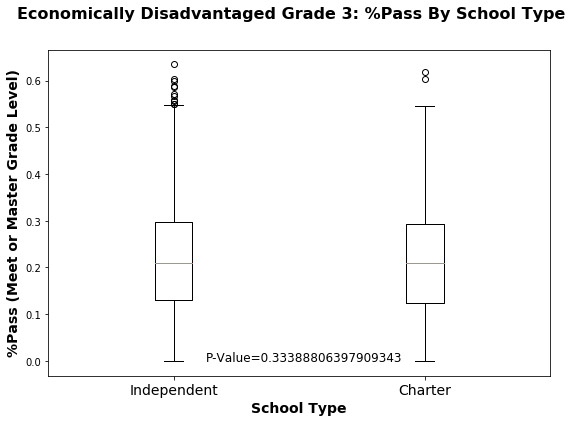

In [67]:
#Create Boxplot

plt.figure(figsize=(9,6))
boxplotdata = [ed3_inp_vector, ed3_cht_vector]

plt.boxplot(boxplotdata)

plt.suptitle('Economically Disadvantaged Grade 3: %Pass By School Type', fontsize=16, fontweight='bold')
plt.xlabel('School Type', fontsize=14, fontweight='bold')
plt.ylabel('%Pass (Meet or Master Grade Level)', fontsize=14, fontweight='bold')
plt.xticks([1,2], ['Independent', 'Charter'], fontsize=14)
plt.text(1.13, 0 ,f'P-Value={stat3}', fontsize=12)

#Save plot
plt.savefig('../reports/EconomicallyDisadvantagedGrade3', dpi=300)